In [53]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [13]:
df = pd.read_csv('/Users/berk/Desktop/deneme.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9986 entries, 0 to 9985
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  9986 non-null   int64 
 1   TITLE       9100 non-null   object
 2   PRICE       9986 non-null   int64 
 3   LOCATION    9986 non-null   object
 4   ROOM        7925 non-null   object
 5   AREA        9986 non-null   object
dtypes: int64(2), object(4)
memory usage: 468.2+ KB


In [14]:
df.head()

,Unnamed: 0,TITLE,PRICE,LOCATION,ROOM,AREA
0,0,Caddebostan Ragıp Paşa Korusu Sitesi 6+1 Sauna...,29900000,"Caddebostan, Kadıköy",6+1,314 m²
1,1,"SUADİYE ŞASKINBAKKAL' da 165 m2, 4+1 SATILIK D...",10300000,"Suadiye, Kadıköy",4+1,165 m²
2,2,Yalı Parseli & Dalyan Sahil'de Deniz Manzaralı...,7295000,"Fenerbahçe, Kadıköy",2+1,82 m²
3,3,NaN,7250000,"Kozyatağı, Kadıköy",3+1,136 m²
4,4,Kadiköy 'de Fahrettin Kerim Gökay Cad. Üstü 18...,7500000,"Feneryolu, Kadıköy",3+1,180 m²


In [15]:
df.columns

Index(['Unnamed: 0', 'TITLE', 'PRICE', 'LOCATION', 'ROOM', 'AREA'], dtype='object')

In [16]:
df.drop(columns={'Unnamed: 0'}, inplace=True)
df['AREA_M2'] = df.AREA.str.extract('(.*) ')
df['DISTRICT'] = df.LOCATION.str.extract(', (.*)')
df['NEIGHBOURHOOD'] = df.LOCATION.str.extract('(.*),')
new = df['ROOM'].str.split("+", expand=True)
df['ROOM'] = new[0]
df['HALL'] = new[1]

In [17]:
df.drop(columns={'LOCATION', 'AREA'}, inplace=True)
df

,TITLE,PRICE,ROOM,AREA_M2,DISTRICT,NEIGHBOURHOOD,HALL
0,Caddebostan Ragıp Paşa Korusu Sitesi 6+1 Sauna...,29900000,6,314,Kadıköy,Caddebostan,1
1,"SUADİYE ŞASKINBAKKAL' da 165 m2, 4+1 SATILIK D...",10300000,4,165,Kadıköy,Suadiye,1
2,Yalı Parseli & Dalyan Sahil'de Deniz Manzaralı...,7295000,2,82,Kadıköy,Fenerbahçe,1
3,NaN,7250000,3,136,Kadıköy,Kozyatağı,1
4,Kadiköy 'de Fahrettin Kerim Gökay Cad. Üstü 18...,7500000,3,180,Kadıköy,Feneryolu,1
...,...,...,...,...,...,...,...
9981,NOVA' DAN ŞİLE ÇENGİLLİ' DE %35 KONUT İMARLI ARSA,3675000,NaN,2952,Tuzla,Mimar Sinan,NaN
9982,TEPEÖREN'DE ESKİ ANKARA ASFALTI CEPHELİ KAT KA...,130000000,NaN,37700,Tuzla,Tepeören,NaN
9983,TUZLA ' DA SATILIK VİLLA DÖRT KATLI VE HAVUZLU...,8975000,6,350,Tuzla,Cami,2
9984,Tuzla Aydıntepe 2+1 Sitede Sıfır Daireler,2575000,2,110,Tuzla,Aydıntepe,1


In [18]:
df.ROOM.value_counts()

3              3015
2              2672
4               935
1               634
5               376
6               144
7                59
8                35
10 ve üzeri      34
9                21
Name: ROOM, dtype: int64

In [19]:
df.drop(df.loc[df['ROOM']=='10 ve üzeri'].index, inplace=True)
df = df.dropna()
df = df.astype({'ROOM':'int', 'AREA_M2':'int', 'HALL':'int'})
df

,TITLE,PRICE,ROOM,AREA_M2,DISTRICT,NEIGHBOURHOOD,HALL
0,Caddebostan Ragıp Paşa Korusu Sitesi 6+1 Sauna...,29900000,6,314,Kadıköy,Caddebostan,1
1,"SUADİYE ŞASKINBAKKAL' da 165 m2, 4+1 SATILIK D...",10300000,4,165,Kadıköy,Suadiye,1
2,Yalı Parseli & Dalyan Sahil'de Deniz Manzaralı...,7295000,2,82,Kadıköy,Fenerbahçe,1
4,Kadiköy 'de Fahrettin Kerim Gökay Cad. Üstü 18...,7500000,3,180,Kadıköy,Feneryolu,1
5,ELYSİUM ELİT KOŞUYOLU'NDA 1+1 SÜPER LÜKS SATIL...,9750000,1,69,Kadıköy,Koşuyolu,1
...,...,...,...,...,...,...,...
9979,TUZLA ORHANLI MAH.DEMOKRASİ CD.ÇIKAN SOKAKTA S...,1600000,4,120,Tuzla,Orhanlı,1
9980,TUZLA ORHANLI MAH. DEMOKRASİ CAD. ÇIKAN SOKAKT...,1500000,2,110,Tuzla,Orhanlı,1
9983,TUZLA ' DA SATILIK VİLLA DÖRT KATLI VE HAVUZLU...,8975000,6,350,Tuzla,Cami,2
9984,Tuzla Aydıntepe 2+1 Sitede Sıfır Daireler,2575000,2,110,Tuzla,Aydıntepe,1


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7008 entries, 0 to 9985
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          7008 non-null   object
 1   PRICE          7008 non-null   int64 
 2   ROOM           7008 non-null   int64 
 3   AREA_M2        7008 non-null   int64 
 4   DISTRICT       7008 non-null   object
 5   NEIGHBOURHOOD  7008 non-null   object
 6   HALL           7008 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 438.0+ KB


In [23]:
df['PRICE'].describe()

count    7.008000e+03
mean     6.779800e+06
std      2.066074e+07
min      7.000000e+03
25%      1.850000e+06
50%      2.980000e+06
75%      5.750000e+06
max      6.000000e+08
Name: PRICE, dtype: float64

In [24]:
df = df[df.PRICE < 30000000]
df

,TITLE,PRICE,ROOM,AREA_M2,DISTRICT,NEIGHBOURHOOD,HALL
0,Caddebostan Ragıp Paşa Korusu Sitesi 6+1 Sauna...,29900000,6,314,Kadıköy,Caddebostan,1
1,"SUADİYE ŞASKINBAKKAL' da 165 m2, 4+1 SATILIK D...",10300000,4,165,Kadıköy,Suadiye,1
2,Yalı Parseli & Dalyan Sahil'de Deniz Manzaralı...,7295000,2,82,Kadıköy,Fenerbahçe,1
4,Kadiköy 'de Fahrettin Kerim Gökay Cad. Üstü 18...,7500000,3,180,Kadıköy,Feneryolu,1
5,ELYSİUM ELİT KOŞUYOLU'NDA 1+1 SÜPER LÜKS SATIL...,9750000,1,69,Kadıköy,Koşuyolu,1
...,...,...,...,...,...,...,...
9979,TUZLA ORHANLI MAH.DEMOKRASİ CD.ÇIKAN SOKAKTA S...,1600000,4,120,Tuzla,Orhanlı,1
9980,TUZLA ORHANLI MAH. DEMOKRASİ CAD. ÇIKAN SOKAKT...,1500000,2,110,Tuzla,Orhanlı,1
9983,TUZLA ' DA SATILIK VİLLA DÖRT KATLI VE HAVUZLU...,8975000,6,350,Tuzla,Cami,2
9984,Tuzla Aydıntepe 2+1 Sitede Sıfır Daireler,2575000,2,110,Tuzla,Aydıntepe,1


<AxesSubplot:xlabel='PRICE'>

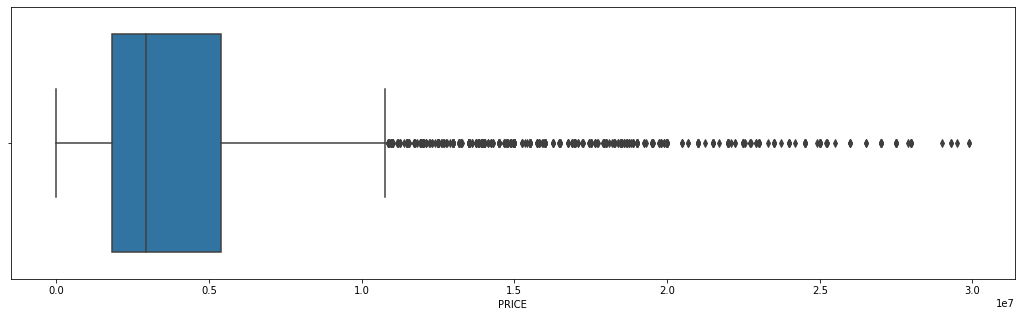

In [25]:
plt.figure(figsize=[18,5])
sns.boxplot(x=df['PRICE'], data=df)

In [26]:
df['PRICE_LOG'] = np.log(df['PRICE'])
df

/var/folders/pt/t0hqszgd5076m2mx3z6z7m7c0000gn/T/ipykernel_23336/714044904.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PRICE_LOG'] = np.log(df['PRICE'])


,TITLE,PRICE,ROOM,AREA_M2,DISTRICT,NEIGHBOURHOOD,HALL,PRICE_LOG
0,Caddebostan Ragıp Paşa Korusu Sitesi 6+1 Sauna...,29900000,6,314,Kadıköy,Caddebostan,1,17.213369
1,"SUADİYE ŞASKINBAKKAL' da 165 m2, 4+1 SATILIK D...",10300000,4,165,Kadıköy,Suadiye,1,16.147654
2,Yalı Parseli & Dalyan Sahil'de Deniz Manzaralı...,7295000,2,82,Kadıköy,Fenerbahçe,1,15.802700
4,Kadiköy 'de Fahrettin Kerim Gökay Cad. Üstü 18...,7500000,3,180,Kadıköy,Feneryolu,1,15.830414
5,ELYSİUM ELİT KOŞUYOLU'NDA 1+1 SÜPER LÜKS SATIL...,9750000,1,69,Kadıköy,Koşuyolu,1,16.092778
...,...,...,...,...,...,...,...,...
9979,TUZLA ORHANLI MAH.DEMOKRASİ CD.ÇIKAN SOKAKTA S...,1600000,4,120,Tuzla,Orhanlı,1,14.285514
9980,TUZLA ORHANLI MAH. DEMOKRASİ CAD. ÇIKAN SOKAKT...,1500000,2,110,Tuzla,Orhanlı,1,14.220976
9983,TUZLA ' DA SATILIK VİLLA DÖRT KATLI VE HAVUZLU...,8975000,6,350,Tuzla,Cami,2,16.009953
9984,Tuzla Aydıntepe 2+1 Sitede Sıfır Daireler,2575000,2,110,Tuzla,Aydıntepe,1,14.761360


<AxesSubplot:>

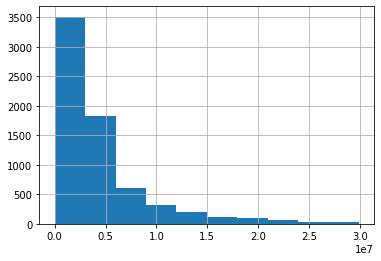

In [29]:
df.PRICE.hist()

<AxesSubplot:>

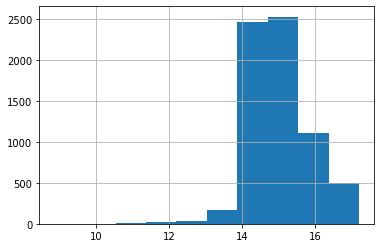

In [30]:
df.PRICE_LOG.hist()

In [31]:
X = df.drop(columns=["TITLE", "DISTRICT", "NEIGHBOURHOOD", "PRICE", "PRICE_LOG"])
y = df.loc[:,"PRICE_LOG"]

In [32]:
X

,ROOM,AREA_M2,HALL
0,6,314,1
1,4,165,1
2,2,82,1
4,3,180,1
5,1,69,1
...,...,...,...
9979,4,120,1
9980,2,110,1
9983,6,350,2
9984,2,110,1


In [34]:
y

0       17.213369
1       16.147654
2       15.802700
4       15.830414
5       16.092778
          ...    
9979    14.285514
9980    14.220976
9983    16.009953
9984    14.761360
9985    15.082458
Name: PRICE_LOG, Length: 6828, dtype: float64

In [36]:
# Creating OLS model
housing_model = sm.OLS(y, X, data=df)

results = housing_model.fit()

# Summary of model
results.summary()

/Users/berk/opt/anaconda3/envs/venv1/lib/python3.9/site-packages/statsmodels/base/model.py:127: ValueWarning: unknown kwargs ['data']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              PRICE_LOG   R-squared (uncentered):                   0.930
Model:                            OLS   Adj. R-squared (uncentered):              0.930
Method:                 Least Squares   F-statistic:                          3.028e+04
Date:                Sat, 24 Dec 2022   Prob (F-statistic):                        0.00
Time:                        16:52:25   Log-Likelihood:                         -19108.
No. Observations:                6828   AIC:                                  3.822e+04
Df Residuals:                    6825   BIC:                                  3.824e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ROOM           1.7136      0.053     32.320      0.000       1.610       1.818
AREA_M2       -0.0035      0.000     -7.122      0.000      -0.004      -0.003
HALL           8.9289      0.125     71.640      0.000       8.685       9.173
==============================================================================
Omnibus:                     3723.723   Durbin-Watson:                   1.664
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            44638.247
Skew:                          -2.364   Prob(JB):                         0.00
Kurtosis:                      14.599   Cond. No.                         514.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
df.DISTRICT.value_counts()

Kadıköy        1106
Pendik          790
Ümraniye        700
Üsküdar         649
Maltepe         598
Sancaktepe      536
Kartal          527
Çekmeköy        474
Ataşehir        430
Tuzla           412
Sultanbeyli     191
Beykoz          172
Şile            168
Adalar           75
Name: DISTRICT, dtype: int64

In [38]:
df_1 = pd.get_dummies(df, columns=['DISTRICT'], drop_first=True)

In [39]:
df_1

,TITLE,PRICE,ROOM,AREA_M2,NEIGHBOURHOOD,HALL,PRICE_LOG,DISTRICT_Ataşehir,DISTRICT_Beykoz,DISTRICT_Kadıköy,DISTRICT_Kartal,DISTRICT_Maltepe,DISTRICT_Pendik,DISTRICT_Sancaktepe,DISTRICT_Sultanbeyli,DISTRICT_Tuzla,DISTRICT_Çekmeköy,DISTRICT_Ümraniye,DISTRICT_Üsküdar,DISTRICT_Şile
0,Caddebostan Ragıp Paşa Korusu Sitesi 6+1 Sauna...,29900000,6,314,Caddebostan,1,17.213369,0,0,1,0,0,0,0,0,0,0,0,0,0
1,"SUADİYE ŞASKINBAKKAL' da 165 m2, 4+1 SATILIK D...",10300000,4,165,Suadiye,1,16.147654,0,0,1,0,0,0,0,0,0,0,0,0,0
2,Yalı Parseli & Dalyan Sahil'de Deniz Manzaralı...,7295000,2,82,Fenerbahçe,1,15.802700,0,0,1,0,0,0,0,0,0,0,0,0,0
4,Kadiköy 'de Fahrettin Kerim Gökay Cad. Üstü 18...,7500000,3,180,Feneryolu,1,15.830414,0,0,1,0,0,0,0,0,0,0,0,0,0
5,ELYSİUM ELİT KOŞUYOLU'NDA 1+1 SÜPER LÜKS SATIL...,9750000,1,69,Koşuyolu,1,16.092778,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9979,TUZLA ORHANLI MAH.DEMOKRASİ CD.ÇIKAN SOKAKTA S...,1600000,4,120,Orhanlı,1,14.285514,0,0,0,0,0,0,0,0,1,0,0,0,0
9980,TUZLA ORHANLI MAH. DEMOKRASİ CAD. ÇIKAN SOKAKT...,1500000,2,110,Orhanlı,1,14.220976,0,0,0,0,0,0,0,0,1,0,0,0,0
9983,TUZLA ' DA SATILIK VİLLA DÖRT KATLI VE HAVUZLU...,8975000,6,350,Cami,2,16.009953,0,0,0,0,0,0,0,0,1,0,0,0,0
9984,Tuzla Aydıntepe 2+1 Sitede Sıfır Daireler,2575000,2,110,Aydıntepe,1,14.761360,0,0,0,0,0,0,0,0,1,0,0,0,0


In [41]:
new_X = df_1.drop(columns=["TITLE", "NEIGHBOURHOOD", "PRICE", "PRICE_LOG"])
new_y = df_1.loc[:,"PRICE_LOG"]

In [42]:
new_X

,ROOM,AREA_M2,HALL,DISTRICT_Ataşehir,DISTRICT_Beykoz,DISTRICT_Kadıköy,DISTRICT_Kartal,DISTRICT_Maltepe,DISTRICT_Pendik,DISTRICT_Sancaktepe,DISTRICT_Sultanbeyli,DISTRICT_Tuzla,DISTRICT_Çekmeköy,DISTRICT_Ümraniye,DISTRICT_Üsküdar,DISTRICT_Şile
0,6,314,1,0,0,1,0,0,0,0,0,0,0,0,0,0
1,4,165,1,0,0,1,0,0,0,0,0,0,0,0,0,0
2,2,82,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,3,180,1,0,0,1,0,0,0,0,0,0,0,0,0,0
5,1,69,1,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9979,4,120,1,0,0,0,0,0,0,0,0,1,0,0,0,0
9980,2,110,1,0,0,0,0,0,0,0,0,1,0,0,0,0
9983,6,350,2,0,0,0,0,0,0,0,0,1,0,0,0,0
9984,2,110,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [43]:
new_y

0       17.213369
1       16.147654
2       15.802700
4       15.830414
5       16.092778
          ...    
9979    14.285514
9980    14.220976
9983    16.009953
9984    14.761360
9985    15.082458
Name: PRICE_LOG, Length: 6828, dtype: float64

In [44]:
# Creating OLS model
housing_model = sm.OLS(new_y, new_X, data=df_1)

results = housing_model.fit()

# Summary of model
results.summary()

/Users/berk/opt/anaconda3/envs/venv1/lib/python3.9/site-packages/statsmodels/base/model.py:127: ValueWarning: unknown kwargs ['data']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              PRICE_LOG   R-squared (uncentered):                   0.991
Model:                            OLS   Adj. R-squared (uncentered):              0.991
Method:                 Least Squares   F-statistic:                          4.567e+04
Date:                Sat, 24 Dec 2022   Prob (F-statistic):                        0.00
Time:                        16:57:47   Log-Likelihood:                         -12199.
No. Observations:                6828   AIC:                                  2.443e+04
Df Residuals:                    6812   BIC:                                  2.454e+04
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
ROOM                     0.5027      0.020     24.771      0.000       0.463       0.543
AREA_M2                  0.0016      0.000      8.723      0.000       0.001       0.002
HALL                     1.3076      0.058     22.359      0.000       1.193       1.422
DISTRICT_Ataşehir       12.2364      0.087    140.006      0.000      12.065      12.408
DISTRICT_Beykoz         11.7006      0.131     89.555      0.000      11.444      11.957
DISTRICT_Kadıköy        12.6619      0.070    180.056      0.000      12.524      12.800
DISTRICT_Kartal         12.0061      0.082    147.067      0.000      11.846      12.166
DISTRICT_Maltepe        12.0495      0.080    150.097      0.000      11.892      12.207
DISTRICT_Pendik         11.6329      0.074    157.502      0.000      11.488      11.778
DISTRICT_Sancaktepe     11.4563      0.083    138.529      0.000      11.294      11.618
DISTRICT_Sultanbeyli    11.4101      0.117     97.235      0.000      11.180      11.640
DISTRICT_Tuzla          11.7191      0.089    131.170      0.000      11.544      11.894
DISTRICT_Çekmeköy       11.6701      0.086    135.128      0.000      11.501      11.839
DISTRICT_Ümraniye       11.8973      0.076    155.904      0.000      11.748      12.047
DISTRICT_Üsküdar        12.1302      0.081    150.002      0.000      11.972      12.289
DISTRICT_Şile           11.6088      0.129     89.938      0.000      11.356      11.862
==============================================================================
Omnibus:                     7261.892   Durbin-Watson:                   0.559
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           588338.840
Skew:                           5.340   Prob(JB):                         0.00
Kurtosis:                      47.203   Cond. No.                     2.34e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.34e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
df_1

,TITLE,PRICE,ROOM,AREA_M2,NEIGHBOURHOOD,HALL,PRICE_LOG,DISTRICT_Ataşehir,DISTRICT_Beykoz,DISTRICT_Kadıköy,DISTRICT_Kartal,DISTRICT_Maltepe,DISTRICT_Pendik,DISTRICT_Sancaktepe,DISTRICT_Sultanbeyli,DISTRICT_Tuzla,DISTRICT_Çekmeköy,DISTRICT_Ümraniye,DISTRICT_Üsküdar,DISTRICT_Şile
0,Caddebostan Ragıp Paşa Korusu Sitesi 6+1 Sauna...,29900000,6,314,Caddebostan,1,17.213369,0,0,1,0,0,0,0,0,0,0,0,0,0
1,"SUADİYE ŞASKINBAKKAL' da 165 m2, 4+1 SATILIK D...",10300000,4,165,Suadiye,1,16.147654,0,0,1,0,0,0,0,0,0,0,0,0,0
2,Yalı Parseli & Dalyan Sahil'de Deniz Manzaralı...,7295000,2,82,Fenerbahçe,1,15.802700,0,0,1,0,0,0,0,0,0,0,0,0,0
4,Kadiköy 'de Fahrettin Kerim Gökay Cad. Üstü 18...,7500000,3,180,Feneryolu,1,15.830414,0,0,1,0,0,0,0,0,0,0,0,0,0
5,ELYSİUM ELİT KOŞUYOLU'NDA 1+1 SÜPER LÜKS SATIL...,9750000,1,69,Koşuyolu,1,16.092778,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9979,TUZLA ORHANLI MAH.DEMOKRASİ CD.ÇIKAN SOKAKTA S...,1600000,4,120,Orhanlı,1,14.285514,0,0,0,0,0,0,0,0,1,0,0,0,0
9980,TUZLA ORHANLI MAH. DEMOKRASİ CAD. ÇIKAN SOKAKT...,1500000,2,110,Orhanlı,1,14.220976,0,0,0,0,0,0,0,0,1,0,0,0,0
9983,TUZLA ' DA SATILIK VİLLA DÖRT KATLI VE HAVUZLU...,8975000,6,350,Cami,2,16.009953,0,0,0,0,0,0,0,0,1,0,0,0,0
9984,Tuzla Aydıntepe 2+1 Sitede Sıfır Daireler,2575000,2,110,Aydıntepe,1,14.761360,0,0,0,0,0,0,0,0,1,0,0,0,0


In [106]:
# df
# creating X and Y parameters
X = df.drop(columns=["TITLE", "NEIGHBOURHOOD", "DISTRICT","PRICE", "PRICE_LOG"])
y = df.loc[:,"PRICE_LOG"]

# gathering %20 of the dataframe for test
X, X_test, y, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [107]:
print("X:", X.shape)
print("y:", y.shape)
print("X_test:", X_test.shape)
print("y_test", y_test.shape)

X: (5462, 3)
y: (5462,)
X_test: (1366, 3)
y_test (1366,)


In [108]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

In [109]:
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_val:", X_val.shape)
print("y_val:", y_val.shape)

X_train: (4096, 3)
y_train: (4096,)
X_val: (1366, 3)
y_val: (1366,)


In [110]:
X

,ROOM,AREA_M2,HALL
2678,4,260,1
2556,3,135,1
7015,2,110,1
4965,2,95,1
5551,1,65,1
...,...,...,...
5445,2,75,1
7548,3,152,1
7589,2,95,1
7803,2,110,1


In [111]:
# Validation aşaması (model seçimi) için kullanacağımız 3 modeli oluşturma

# Lineer Regresyon
lm = LinearRegression()

# Ridge Regresyon
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)

lm_reg = Ridge(alpha=1)

# Polinomal Regresyon
poly = PolynomialFeatures(degree=2) 

X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
X_test_poly = poly.transform(X_test.values)

lm_poly = LinearRegression()

In [112]:
# Validation sonuçları

lm.fit(X_train, y_train)
print(f'Linear Regression val R^2: {lm.score(X_val, y_val):.3f}')

lm_reg.fit(X_train_scaled, y_train)
print(f'Ridge Regression val R^2: {lm_reg.score(X_val_scaled, y_val):.3f}')

lm_poly.fit(X_train_poly, y_train)
print(f'Degree 2 polynomial regression val R^2: {lm_poly.score(X_val_poly, y_val):.3f}')

Linear Regression val R^2: 0.283
Ridge Regression val R^2: 0.283
Degree 2 polynomial regression val R^2: 0.103


In [113]:
#df_1

# X ve Y değişkenlerimizi oluşturma
X = df_1.drop(columns=["TITLE", "NEIGHBOURHOOD", "PRICE", "PRICE_LOG"])
y = df_1.loc[:,"PRICE_LOG"]

# Veri setinin %20'lik kısmını Test aşaması için saklıyoruz
X, X_test, y, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [114]:
print("X:", X.shape)
print("y:", y.shape)
print("X_test:", X_test.shape)
print("y_test", y_test.shape)

X: (5462, 16)
y: (5462,)
X_test: (1366, 16)
y_test (1366,)


In [115]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

In [116]:
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_val:", X_val.shape)
print("y_val:", y_val.shape)

X_train: (4096, 16)
y_train: (4096,)
X_val: (1366, 16)
y_val: (1366,)


In [117]:
# Validation aşaması (model seçimi) için kullanacağımız 3 modeli oluşturma

# Lineer Regresyon
lm = LinearRegression()

# Ridge Regresyon
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)

lm_reg = Ridge(alpha=1)

# Polinomal Regresyon
poly = PolynomialFeatures(degree=2) 

X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
X_test_poly = poly.transform(X_test.values)

lm_poly = LinearRegression()

In [118]:
# Validation sonuçları

lm.fit(X_train, y_train)
print(f'Linear Regression val R^2: {lm.score(X_val, y_val):.3f}')

lm_reg.fit(X_train_scaled, y_train)
print(f'Ridge Regression val R^2: {lm_reg.score(X_val_scaled, y_val):.3f}')

lm_poly.fit(X_train_poly, y_train)
print(f'Degree 2 polynomial regression val R^2: {lm_poly.score(X_val_poly, y_val):.3f}')

Linear Regression val R^2: 0.529
Ridge Regression val R^2: 0.529
Degree 2 polynomial regression val R^2: 0.432


In [119]:
#train and validation
X.shape

(5462, 16)

In [94]:
# İşte modelimizin başarısı
X_scaled = scaler.fit_transform(X.values)
lm_reg.fit(X_scaled,y)
print(f'Ridge Regression test R^2: {lm_reg.score(X_test_scaled, y_test):.3f}')

Ridge Regression test R^2: 0.500


In [121]:
scaler

StandardScaler()